## Aula 3 - BoW - Bag of Words: mochila de palavras (CountVectorizer e tf-idf)

- **BoW** : transformar textos em matrizes por similaridade -> transfomração esparsa
- **Embbedings** : transformação densa
- **tf-idf** = tf(t,d) * idf(t,D), onde idf(t,D) = log(|D|/{n_t}) -> Importância de um termo t.
- **sklearn** : CountVectorizer e TfidfTransformer -> TfidfVectorizer 

In [1]:
# Carrega as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

# Baixa as listas de stopwords e as tokenizações
nltk.download('stopwords')
nltk.download('punkt')

# Define as stopwords em inglês
sw_english = set(stopwords.words('english'))

# Instancia o PorterStemmer | trocar por lemmatização
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [82]:
# Carrega o conjunto de dados
movies = pd.read_csv('dataset/movies.csv', index_col = 0)

# Retira uma amostra do conjunto de dados
movies_sample = movies.sample(frac = 0.1, replace=False)

# Cria um pipeline
def pre_text(string):
    string = re.sub(r"[^a-zA-Z0-9]+", " ", string)
    string = string.lower()
    words = word_tokenize(string)
    filter_words = [word for word in words if word not in sw_english]
    stem_words = []
    for word in filter_words:
        sw = stemmer.stem(word)
        stem_words.append(sw)
    return stem_words

In [83]:
movies_sample.head()

,text,label
33740,I am in a movie club at my school and I was fo...,0
33357,"First things first, how can someone with his c...",0
3036,I have two good things to say about this film:...,0
19522,"Whoo-boy, that was definitely one of the worst...",0
23104,This film was the worst film I have ever seen....,0


In [84]:
movies_sample.iloc[0,0]

"I am in a movie club at my school and I was forced to sit and watch this utterly dismal film. The film's story is not dismal, but the entire movie itself is exceedingly dismal. The acting was absolutely dreadful. The children were overly whiny. A metal pole could have done a better job. I wanted desperately to fall asleep, but because the television was so loud, I was kept from peace. The monkey's are neither cute, nor are they funny. The drama is laugh-worthy. I cannot remember when I saw a more dreadful film. The story is weak, thin, predictable, and completely fake. The adults try to be good actors, but they just can't seem to break through stereotypes. The girl even appears to want to leave the film via falling off a hill during the movie in order to leave it, I don't blame her. Micheal Anderson should publicly apologize for this film. Not just to me, but to everyone else who was forced to sit through this awful film. In fact, I apologize to you. Even if I had nothing to do with t

In [85]:
movies_sample['filtered_words'] = movies_sample["text"].apply(lambda x: pre_text(x))

movies_sample['join_words'] = movies_sample['filtered_words'].apply(lambda x: ' '.join(x))

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

X = movies_sample["join_words"]
y = movies_sample["label"]

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [87]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

text_c = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("c", RandomForestClassifier())
])

text_c

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('c', RandomForestClassifier())])

In [88]:
text_c.fit(X_train, y_train)
predictions = text_c.predict(X_test)

In [89]:
predictions

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [90]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

confusion_matrix(y_test, predictions)

array([[527, 115],
       [ 90, 518]], dtype=int64)

In [91]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       642
           1       0.82      0.85      0.83       608

    accuracy                           0.84      1250
   macro avg       0.84      0.84      0.84      1250
weighted avg       0.84      0.84      0.84      1250



In [92]:
print(accuracy_score(y_test, predictions))

0.836


In [94]:
y_prob_rf = text_c.predict_proba(X_test)
# Slice do predict proba
y_prob_rf = y_prob_rf[:, 1]

In [96]:
y_prob_rf

array([0.66, 0.29, 0.28, ..., 0.37, 0.3 , 0.6 ])

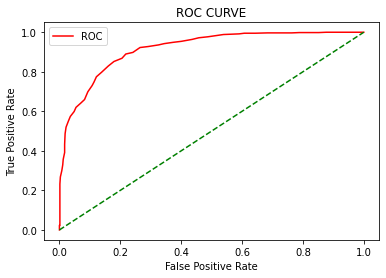

In [99]:
# ROC-AUC 
fp, tp, thresholds = roc_curve(y_test, y_prob_rf)
plt.plot(fp, tp, color = 'red', label = 'ROC')
plt.plot([0,1], [0,1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend()
plt.show()

In [100]:
auc = roc_auc_score(y_test, y_prob_rf)
print(auc)

0.9163951057550418


LeIA: https://github.com/rafjaa/LeIA

----

#### Exercício

In [101]:
# Carrega as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

In [102]:
spam = pd.read_csv("dataset/SMSSpamCollection", sep = "\t", names = ["label","message"])
spam.head()
# Queremos determinar se a mensagem é um spam (1) ou não (0)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [124]:
spam.info()
# Sem valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   label           5572 non-null   object
 1   message         5572 non-null   object
 2   filtered_words  5572 non-null   object
 3   join_words      5572 non-null   object
dtypes: object(4)
memory usage: 174.2+ KB


In [126]:
# Trocar os nomes das classes para 0 ('ham') e 1 ('spam')
spam["label"].replace("ham", 0, inplace = True)
spam["label"].replace("spam", 1, inplace = True)

In [128]:
spam["label"].unique()

array([0, 1], dtype=int64)

In [129]:
# Baixa as listas de stopwords e as tokenizações
nltk.download('stopwords')
nltk.download('punkt')

# Define as stopwords em inglês
sw_english = set(stopwords.words('english'))

# Instancia o PorterStemmer | trocar por lemmatização
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [130]:
# Cria um pipeline
def pre_text(string):
    string = re.sub(r"[^a-zA-Z0-9]+", " ", string)
    string = string.lower()
    words = word_tokenize(string)
    filter_words = [word for word in words if word not in sw_english]
    stem_words = []
    for word in filter_words:
        sw = stemmer.stem(word)
        stem_words.append(sw)
    return stem_words

In [131]:
spam['filtered_words'] = spam["message"].apply(lambda x: pre_text(x))
spam['join_words'] = spam['filtered_words'].apply(lambda x: ' '.join(x))

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

X = spam["join_words"]
y = spam["label"]

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [133]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

text_c = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("c", RandomForestClassifier())
])

text_c

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('c', RandomForestClassifier())])

In [134]:
text_c.fit(X_train, y_train)
predictions = text_c.predict(X_test)

In [135]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

confusion_matrix(y_test, predictions)

array([[1202,    0],
       [  26,  165]], dtype=int64)

In [136]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1202
           1       1.00      0.86      0.93       191

    accuracy                           0.98      1393
   macro avg       0.99      0.93      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [137]:
print(accuracy_score(y_test, predictions))

0.9813352476669059


In [138]:
y_prob_rf = text_c.predict_proba(X_test)
# Slice do predict proba
y_prob_rf = y_prob_rf[:,1] 

In [139]:
y_prob_rf

array([0.  , 0.  , 0.05, ..., 0.02, 0.  , 0.14])

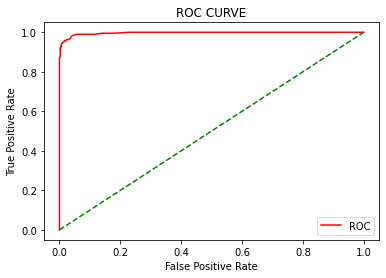

In [140]:
# ROC-AUC 
fp, tp, thresholds = roc_curve(y_test, y_prob_rf)
plt.plot(fp, tp, color = 'red', label = 'ROC')
plt.plot([0,1], [0,1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend()
plt.show()

In [142]:
auc = roc_auc_score(y_test, y_prob_rf)
print(auc)

0.9966613236229321


#### Testando com LinearSVC

In [143]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

text_SVC = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("SVC", LinearSVC())
])

text_SVC

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('SVC', LinearSVC())])

----

### Análise de Sentimentos

In [144]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...


True

In [146]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

In [152]:
m = 'this movie is awesome'
print(sentiment.polarity_scores(m))

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}


In [153]:
m = 'this ice cream is delicious'
print(sentiment.polarity_scores(m))

{'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.5719}


In [154]:
m = 'Happy good times'
print(sentiment.polarity_scores(m))

{'neg': 0.0, 'neu': 0.132, 'pos': 0.868, 'compound': 0.765}
